# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

In [2]:
ames.describe()

We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

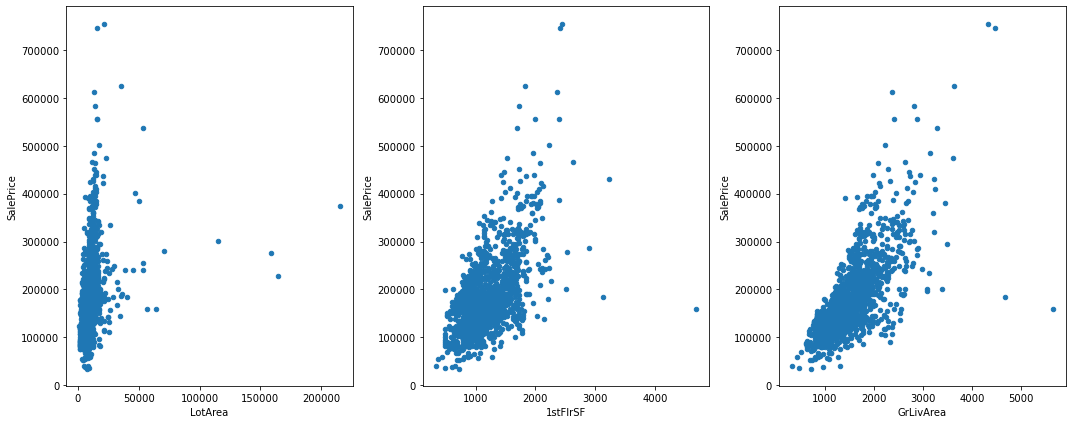

In [4]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt


fig,(ax1,ax2,ax3) = plt.subplots(nrows =1,ncols=3,figsize =(15,6))
ames.plot.scatter(x='LotArea',y='SalePrice',ax=ax1)
ames.plot.scatter(x='1stFlrSF',y='SalePrice',ax=ax2)
ames.plot.scatter(x='GrLivArea',y='SalePrice',ax=ax3)

fig.tight_layout()
plt.show();

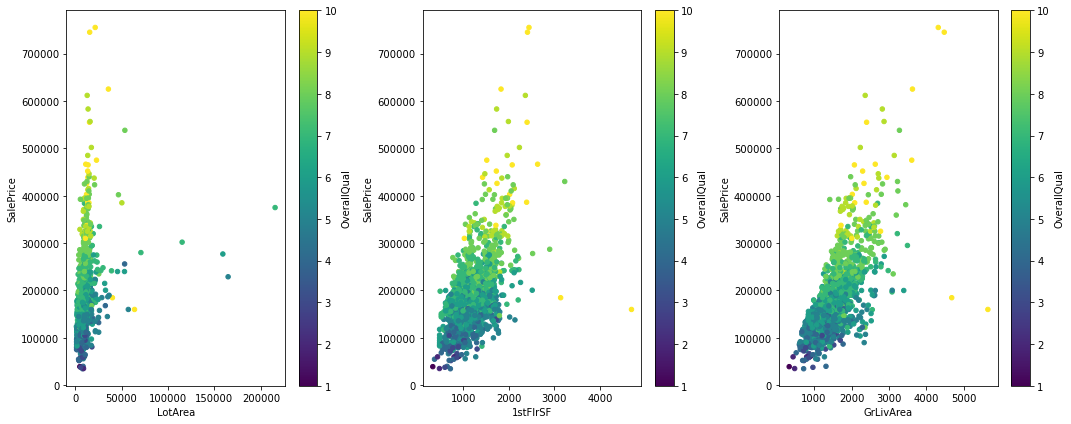

In [5]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

ames.plot.scatter(x='LotArea', y='SalePrice', c='OverallQual', cmap='viridis', ax=ax1)
ames.plot.scatter(x='1stFlrSF', y='SalePrice', c='OverallQual', cmap='viridis', ax=ax2)
ames.plot.scatter(x='GrLivArea', y='SalePrice', c='OverallQual', cmap='viridis', ax=ax3)

plt.tight_layout()
plt.show()


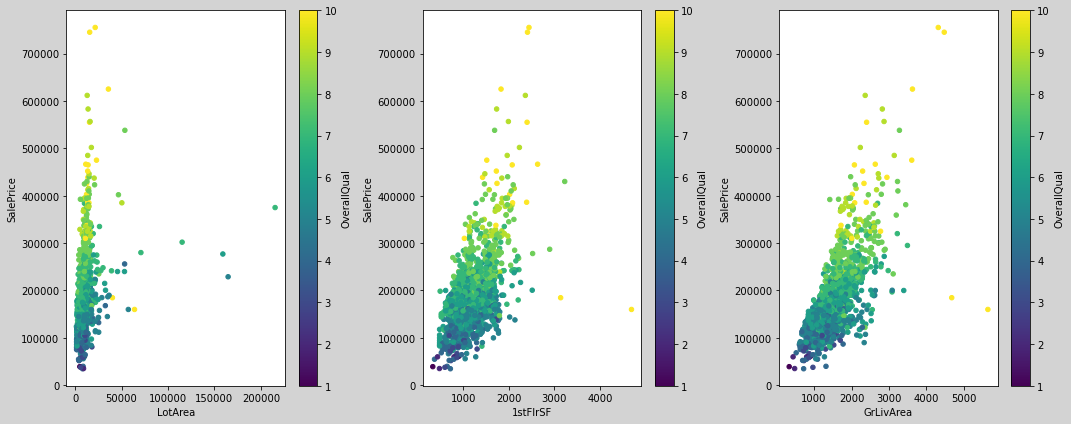

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Set the background color of the entire figure
fig.set_facecolor('lightgray')

# Scatter plots with color mapping
ames.plot.scatter(x='LotArea', y='SalePrice', c='OverallQual', cmap='viridis', ax=ax1)
ames.plot.scatter(x='1stFlrSF', y='SalePrice', c='OverallQual', cmap='viridis', ax=ax2)
ames.plot.scatter(x='GrLivArea', y='SalePrice', c='OverallQual', cmap='viridis', ax=ax3)

plt.tight_layout()
plt.show()


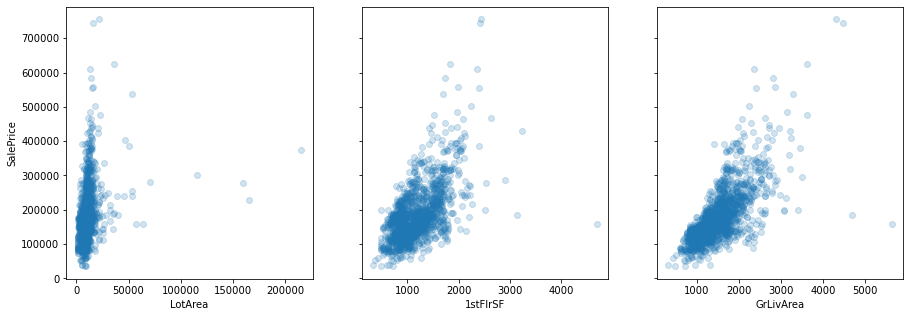

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, figsize=(15,5), sharey=True)
axes[0].set_ylabel("SalePrice")

for i, col in enumerate(ames_subset.drop("SalePrice", axis=1).columns):
    ax = axes[i]
    ax.scatter(ames_subset[col], ames_subset["SalePrice"], alpha=0.2)
    ax.set_xlabel(col)

# Your written answer here - do these seem like good candidates for linear regression?
Yes they do


All three of these features seem to have a linear relationship with SalePrice

GrLivArea seems to have a very strong positive correlation

1stFlrSF seems to have the most variance vs. SalePrice

All three have a few outliers that could potentially skew the results

In [8]:
# Explore correlation to find a good starting point
ames_subset.corr()['SalePrice']

LotArea      0.263843
1stFlrSF     0.605852
GrLivArea    0.708624
SalePrice    1.000000
Name: SalePrice, dtype: float64

In [9]:
# Your code here - define y and baseline X
# Since x='GrLivArea' (Above ground Living area)shows a stronger positive correlation(0.7086we will use it as the independent variable

y = ames_subset["SalePrice"]
X_baseline = ames_subset[["GrLivArea"]]


In [10]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 11 May 2025   Prob (F-statistic):          4.52e-223
Time:                        22:47:59   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

# Your written answer here - interpret model results
- About 50% of the variance in SalePrice is explained by the model
- The model is statistically significant overall with the F-statistic p-value  is less than the standard alpha value 0.05 
- The model coefficients (const,GrLivArea) are statistically significant overall with their t-statistic p-values are less than the standard alpha value of 0.05
- Our intercept is about 18,570 Meaning a home with 0 square feet above ground living area costs about 18,570 dollars
- Our coefficient for GrLivArea is about 107.13, which means that for each additional square
foot of above ground living area, we expect the price to increase about 107.13 dollars


## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

# ``Since we are defining x and our subset has y ....drop the y first``

In [15]:
# Your code here - define X
# Since we are defining x and our subset has y ....drop the y first
X = ames_subset.drop('SalePrice',axis=1)
X

,LotArea,1stFlrSF,GrLivArea
Id,,,
1,8450,856,1710
2,9600,1262,1262
3,11250,920,1786
4,9550,961,1717
5,14260,1145,2198
...,...,...,...
1456,7917,953,1647
1457,13175,2073,2073
1458,9042,1188,2340


In [12]:
# Your code here - fit model and display results
model = sm.OLS(y,sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Sun, 11 May 2025   Prob (F-statistic):          1.57e-262
Time:                        22:47:59   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

# Your written answer here - interpret model results. Does this model seem better than the previous one?
- About 57% of the variance in SalePrice is explained by our model.This is about 7% more variance explained than the simple
model
- The model is statistically significant overall with F-Statistic p-value less than than the standard alpha value 0.05
- The model coefficients(const,1stFlrSF,GrLivArea) are statistically significant with t-Statistic p values being less than 0.05  but not our coefficient for LotArea whose t-statistic value(0.051) is more than alpha 
- So, we have an improvement in terms of variance explained (R-Squared), but also
some values are not statistically significant. It depends on the use case whether
this model would be considered "better"

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

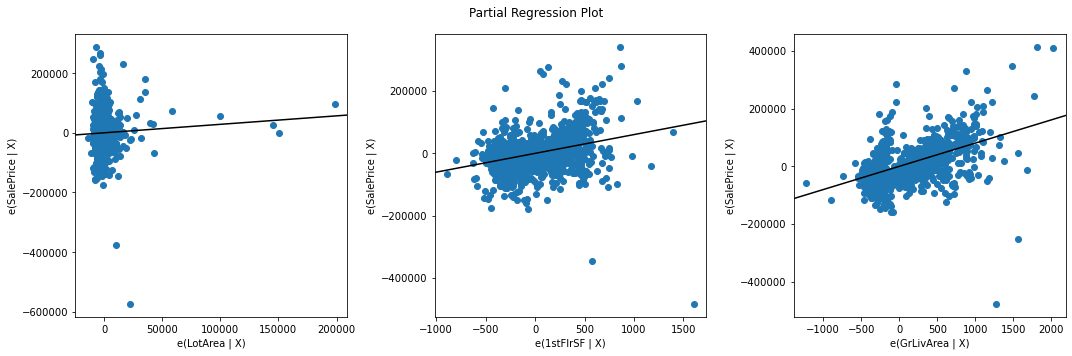

In [14]:
# Your code here - create partial regression plots for each predictor
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(1,3),
    fig=fig)
plt.tight_layout()
plt.show()

In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [20]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [22]:
# Your code here - compare R-Squared
results.rsquared

0.5649801771384368

In [23]:
lr.score(X, y)

0.5649801771384368

In [26]:
# Your code here - compare intercept and coefficients
results.params

const       -14313.408857
LotArea          0.284134
1stFlrSF        60.286646
GrLivArea       80.606058
dtype: float64

In [27]:
results.params.values

array([-1.43134089e+04,  2.84133589e-01,  6.02866463e+01,  8.06060583e+01])

In [28]:
import numpy as np
np.append(lr.intercept_, lr.coef_)

array([-1.43134089e+04,  2.84133589e-01,  6.02866463e+01,  8.06060583e+01])

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.